## Advanced Sorting Algorithms: QuickSort and Merge Sort

In [ ]:
## Define some function useful for testing
import random

## generate an array of n random integers up to 10000
def get_random_array(n):
    return [random.randint(0, 10000) for _ in range(n)]

def test_sorting_algorithm(algorithm):
    for _ in range(100):
        A = get_random_array(random.randint(0, 1000))
        A_sorted = algorithm(A)
        assert A_sorted == sorted(A), "FAIL!"
        
# testing testing function
test_sorting_algorithm(sorted)

## QuickSort 

Quicksort is a divide-and-conquer algorithm. It works by selecting a 'pivot' element from the array and partitioning the other elements into two sub-arrays, according to whether they are less than or greater than the pivot. The sub-arrays are then sorted recursively. This can be done **in-place**, requiring small additional amounts of memory to perform the sorting.

Thus, the most important part of QuickSort is its partition algorithm. 
Given a pivot element, the partition algorithm splits a subarray into three parts.

- Elements that are smaller than or equal to the pivot
- The pivot
- Elements that are greater than or equal to the pivot

The algorithm works in-place, i.e., it performs the partition within the subarray itself without any extra space.

### Exercise: binary vector
You are given a binary vector, i.e., each element is either 0 or 1. Implements an easy variant of partition to sort the vector.

In [ ]:
import random 

binary = [random.randint(0,1) for _ in range(20)]
print(binary)

[0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0]


In [ ]:
## Your implementation goes here
def binary_partition(A):
  j = 0
  for i in range(len(A)):    # if the current element is 0, switch the element in the index j with the element in the index i, then increment j by one
    if A[i] == 0:
      A[i],A[j] = A[j],A[i]
      j += 1
  return A

print(binary_partition(binary))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]


### Exercise: QuickSort
Below an implementation of QuickSort. 

In this exercise you have to:
- Write detailed comments to describe crucial parts of the code below (to prove you have understand it)
- Implement a random selection of the pivot element

In [ ]:
def partition(A, low, high): 
    pivot = A[high] #select the pivot (last element) around which to partition the subarray
    i = low-1 #set the index as -1 (posso metterlo anche = low e poi fare i += 1 dopo lo scambio? non è più logico?)
  
    for j in range(low, high): #iteration along the whole array
        if A[j] <= pivot: # if the condition is true move the index one position forward and exchange the current value with the value in the index position
            i = i+1 
            A[i], A[j] = A[j], A[i] 
  
    A[i+1], A[high] = A[high], A[i+1] #at the end of the for loop exchange the pivot element with the element in position index + 1 to put the pivot in the middle of the array
    return i+1 # return the index position of the pivot 


In [ ]:
# random selection of the pivot element

def partition(A, low, high): 
    p = random.randint(low,high)
    pivot = A[p]
    i = low-1 
    A[p], A[high]  = A[high], A[p] #swapping than I can use the procedure as already mentioned
    for j in range(low, high): 
        if A[j] <= pivot: 
            i = i+1 
            A[i], A[j] = A[j], A[i] 
  
    A[i+1], A[high] = A[high], A[i+1] 
    return i+1 

In [ ]:
def quickSort_rec(A, low, high):
    if low < high: 
        pi = partition(A, low, high) # partition function on the array
        quickSort_rec(A, low, pi-1)  # recursive call on the elements before the pivot
        quickSort_rec(A, pi+1, high) # recursive call on the elements after the pivot

In [ ]:
def quickSort(B):
    A = B[:] # Copy the array just because we decided to return a sorted copy of the original array 
    quickSort_rec(A, 0, len(A)-1)
    return A

In [ ]:
quickSort([2, 1, 4, 3])

[1, 2, 3, 4]

In [ ]:
test_sorting_algorithm(quickSort)

## Let's do some experiments

Is QuickSort faster than InsertionSort and SelectionSort in practice?

It depends from the best case (partition perfectly balanced) /worst case (partition unbalanced) and it depends on the kind of pivot chosen. How we choose it? Random, 50% of choosing a good one. Can't spend too much time on selecting it to not slow th algorithm

In [ ]:
def insertionSort(coll):
    A = list(coll)
    for i in range(1, len(A)):
        curr = A[i]
        j = i-1
        while j >= 0 and curr < A[j]:
            A[j+1] = A[j]
            j -= 1
        A[j+1] = curr
    return A

In [ ]:
def selectionSort(coll):
    A = list(coll)
    for i in range(len(A)): 
        # Find the minimum element in remaining unsorted array 
        min_idx = i 
        for j in range(i+1, len(A)): 
            if A[min_idx] > A[j]: 
                min_idx = j 

        # Swap the found minimum element with  
        # the first element         
        A[i], A[min_idx] = A[min_idx], A[i]
    return A

In [ ]:
A = get_random_array(1000)

In [ ]:
%timeit quickSort(A)

100 loops, best of 5: 3.21 ms per loop


In [ ]:
%timeit insertionSort(A)

10 loops, best of 5: 42.9 ms per loop


In [ ]:
%timeit selectionSort(A)

10 loops, best of 5: 41.6 ms per loop


### More than 30x faster with arrays of length 1000. 

Try to run the experiments with an array of 10000. **Run insertion sort and selection sort just before you go to sleep.** 

### Let's see how time changes by increasing the length of the array

In [ ]:
qs_t = []
is_t = []
ss_t = []

lens = [2**i for i in range(1, 11)]

for n in lens:
    A = get_random_array(n)
    result = %timeit -o quickSort(A)
    qs_t.append( result.best )
    result = %timeit -o insertionSort(A)
    is_t.append( result.best )
    result = %timeit -o selectionSort(A)
    ss_t.append( result.best )

The slowest run took 6.67 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 3.19 µs per loop
The slowest run took 4.73 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 5: 759 ns per loop


KeyboardInterrupt: ignored

In [ ]:
import matplotlib.pyplot as plt # standard way to import

%matplotlib inline # any cell within the notebook that creates a plot will embed a PNG image of the resulting graphic
plt.rcParams["figure.figsize"] = (20,10)
plt.style.use('ggplot')

UsageError: unrecognized arguments: # any cell within the notebook that creates a plot will embed a PNG image of the resulting graphic


ValueError: ignored

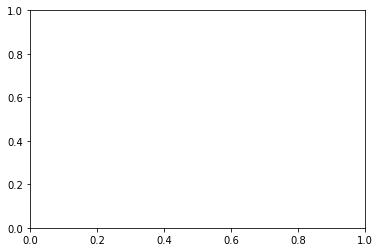

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(lens, qs_t, "g--", label="QuickSort")
ax.plot(lens, is_t, "r--", label="InsertionSort")
ax.plot(lens, ss_t, "b--", label="SelectionSort")

_ = ax.legend(loc="best")

## Merge Sort
Merge Sort is an efficient, general-purpose, comparison-based sorting algorithm. Most implementations produce a **stable sort**, which means that the order of equal elements is the same in the input and output. 

Merge sort is a divide and conquer algorithm that was invented by John von Neumann in 1945.

Below a running example.

### Exercise: Merge Sort
Complete the implementation of Merge Sort by implementing function ```merge()```.

In [ ]:
def merge(A,l,m,r):

  n1 = m-l+1      # lenght first half
  n2 = r-m        # length second half
  
  L = []
  R = []

  for i in range(n1):            # create left array and right array with the element respectively in the first half and the second half of A
    L.append(A[l+i])
  for j in range(n2):
    R.append(A[m+1+j])

  k = l
  j = 0
  i = 0

  while i < n1 and j < n2:               # sorting in ascending order A using the L and R
    if L[i] <= R[j]:
      A[k] = L[i]
      i += 1
    else:
      A[k] = R[j]
      j += 1
    k += 1
  
  while i < n1:                   # copy the remeaning elements in L or in R based on the condition that stop the while loop
      A[k] = L[i]
      i += 1
      k += 1
       
  while j < n2:
      A[k] = R[j]
      j += 1
      k += 1

In [ ]:
def mergeSort_rec(A, l, r): 
    
    if l < r:       
        m = (l+(r-1))//2  # Same as (l+r)//2, but avoids overflow for large l and h 
    
        # Sort first and second halves 
        mergeSort_rec(A, l, m) 
        mergeSort_rec(A, m+1, r)                                 
        merge(A, l, m, r)

In [ ]:
def mergeSort(B):
    A = B[:] # Copy the array just because we decided to return a sorted copy of the original array 
    mergeSort_rec(A, 0, len(A)-1)
    return A

In [ ]:
A = get_random_array(10)

In [ ]:
test_sorting_algorithm(mergeSort)

In [ ]:
print(sorted(A))
print()
print(mergeSort(A))

[420, 2135, 2144, 2970, 8609, 8811, 8943, 9218, 9410, 9586]

[420, 2135, 2144, 2970, 8609, 8811, 8943, 9218, 9410, 9586]


In [ ]:
A = get_random_array(10000)

In [ ]:
%timeit quickSort(A)

KeyboardInterrupt: ignored

In [ ]:
%timeit mergeSort(A)